In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
r = np.random.randn((1000))
S0 = 1
S = np.cumsum(r) + S0

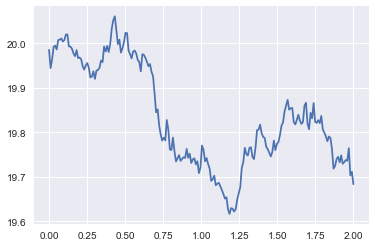

In [22]:
T = 2
mu = 0.
sigma = 0.01
S0 = 20
dt = 0.01
N = round(T/dt)
t = np.linspace(0, T, N)
W = np.random.standard_normal(size = N) 
W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
X = (mu-0.5*sigma**2)*t + sigma*W 
S = S0*np.exp(X) ### geometric brownian motion ###
plt.plot(t, S)
plt.show()


In [75]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [107]:
from blackscholes import geometric_brownian_motion, blackScholes
from scipy.stats import norm
import pandas as pd

In [102]:
geometric_brownian_motion(mu=0., sigma=0.01, s0=1, dt=0.01)

(array([ 0.        ,  0.01005025,  0.0201005 ,  0.03015075,  0.04020101,
         0.05025126,  0.06030151,  0.07035176,  0.08040201,  0.09045226,
         0.10050251,  0.11055276,  0.12060302,  0.13065327,  0.14070352,
         0.15075377,  0.16080402,  0.17085427,  0.18090452,  0.19095477,
         0.20100503,  0.21105528,  0.22110553,  0.23115578,  0.24120603,
         0.25125628,  0.26130653,  0.27135678,  0.28140704,  0.29145729,
         0.30150754,  0.31155779,  0.32160804,  0.33165829,  0.34170854,
         0.35175879,  0.36180905,  0.3718593 ,  0.38190955,  0.3919598 ,
         0.40201005,  0.4120603 ,  0.42211055,  0.4321608 ,  0.44221106,
         0.45226131,  0.46231156,  0.47236181,  0.48241206,  0.49246231,
         0.50251256,  0.51256281,  0.52261307,  0.53266332,  0.54271357,
         0.55276382,  0.56281407,  0.57286432,  0.58291457,  0.59296482,
         0.60301508,  0.61306533,  0.62311558,  0.63316583,  0.64321608,
         0.65326633,  0.66331658,  0.67336683,  0.6

In [61]:
t = 2.
dt = 0.01
N = int(round(t / dt))
np.linspace(0, t, N)
tt = np.linspace(0, t, N)
W = norm((N))

In [105]:
@interact(mu=(-0.02, 0.05, 0.01), sigma=(0.01, 0.1, 0.005), S0=(1,100,10), dt=(0.001, 0.1, 0.001))
def plot_gbm(mu, sigma, S0, dt):
    s, t = geometric_brownian_motion(mu=mu, sigma=sigma, t=2, dt=dt, s0=S0)
    pd.Series(t, s).plot()
    plt.show()

In [198]:
df.delta

1.000000e+00    0.691462
9.900000e-01    0.690580
9.800000e-01    0.689691
9.700000e-01    0.688797
9.600000e-01    0.687897
9.500000e-01    0.686991
9.400000e-01    0.686080
9.300000e-01    0.685162
9.200000e-01    0.684238
9.100000e-01    0.683308
9.000000e-01    0.682372
8.900000e-01    0.681429
8.800000e-01    0.680480
8.700000e-01    0.679524
8.600000e-01    0.678562
8.500000e-01    0.677593
8.400000e-01    0.676616
8.300000e-01    0.675633
8.200000e-01    0.674643
8.100000e-01    0.673645
8.000000e-01    0.672640
7.900000e-01    0.671627
7.800000e-01    0.670606
7.700000e-01    0.669578
7.600000e-01    0.668542
7.500000e-01    0.667497
7.400000e-01    0.666444
7.300000e-01    0.665383
7.200000e-01    0.664313
7.100000e-01    0.663235
                  ...   
2.900000e-01    0.606135
2.800000e-01    0.604332
2.700000e-01    0.602494
2.600000e-01    0.600620
2.500000e-01    0.598706
2.400000e-01    0.596752
2.300000e-01    0.594754
2.200000e-01    0.592710
2.100000e-01    0.590616


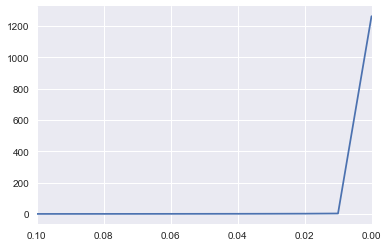

In [192]:
df.ix[0.1:,:].gamma.plot()

In [195]:
tau = np.clip( np.linspace(1.0, .0, 101), 0.0000001, 100)
S = 1.
K = 1.
sigma = 1
df = pd.DataFrame.from_dict(blackScholes(tau, S, K, sigma))
df.index = tau

In [ ]:
@interact(mu=(-0.02, 0.05, 0.01), sigma=(0.01, 0.1, 0.005), S0=(1,100,10), dt=(0.001, 0.1, 0.001))
def plot_gbm(mu, sigma, S0, dt):
    s, t = geometric_brownian_motion(mu=mu, sigma=sigma, t=2, dt=dt, s0=S0)
    pd.Series(t, s).plot()
    plt.show()

## Q-learning

- Initialize $V(s)$ arbitrarily
- Repeat for each episode
- Initialize s
- Repeat (for each step of episode)
- -    $\alpha \leftarrow$ action given by $\pi$ for $s$
- - Take action a, observe reward r, and next state s'
- - $V(s) \leftarrow V(s) + \alpha [r = \gamma V(s') - V(s)]$ 
- - $s \leftarrow s'$
- until $s$ is terminal

In [6]:
import td

In [10]:
import scipy as sp

In [11]:
α = 0.05
γ = 0.1
td_learning = td.TD(α, γ)

## Black Scholes

$${\displaystyle d_{1}={\frac {1}{\sigma {\sqrt {T-t}}}}\left[\ln \left({\frac {S_{t}}{K}}\right)+(r-q+{\frac {1}{2}}\sigma ^{2})(T-t)\right]}$$

$${\displaystyle C(S_{t},t)=e^{-r(T-t)}[FN(d_{1})-KN(d_{2})]\,}$$

$${\displaystyle d_{2}=d_{1}-\sigma {\sqrt {T-t}}={\frac {1}{\sigma {\sqrt {T-t}}}}\left[\ln \left({\frac {S_{t}}{K}}\right)+(r-q-{\frac {1}{2}}\sigma ^{2})(T-t)\right]}$$

In [12]:
d_1 = lambda σ, T, t, S, K: 1. / σ / np.sqrt(T - t) * (np.log(S / K) + 0.5 * (σ ** 2) * (T-t))
d_2 = lambda σ, T, t, S, K: 1. / σ / np.sqrt(T - t) * (np.log(S / K) - 0.5 * (σ ** 2) * (T-t))

call = lambda σ, T, t, S, K: S * sp.stats.norm.cdf( d_1(σ, T, t, S, K) ) - K * sp.stats.norm.cdf( d_2(σ, T, t, S, K) )

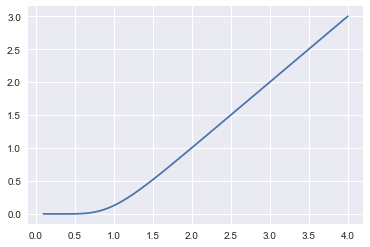

In [13]:
plt.plot(np.linspace(0.1, 4., 100), call(1., 1., .9, np.linspace(0.1, 4., 100), 1.))

In [14]:
d_1(1., 1., 0., 1.9, 1)

1.1418538861723948

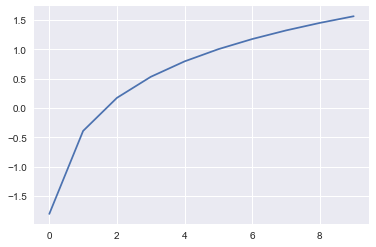

In [15]:
plt.plot(d_1(1., 1., 0., np.linspace(0.1, 2.9, 10), 1))

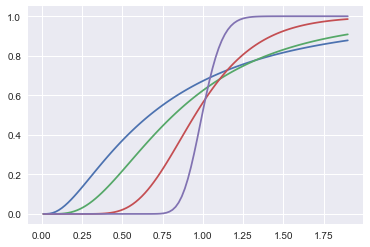

In [16]:
plt.plot(np.linspace(0.01, 1.9, 100), sp.stats.norm.cdf(d_1(1., 1., 0.2, np.linspace(0.01, 1.9, 100), 1)))
plt.plot(np.linspace(0.01, 1.9, 100), sp.stats.norm.cdf(d_1(1., 1., 0.6, np.linspace(0.01, 1.9, 100), 1)))
plt.plot(np.linspace(0.01, 1.9, 100), sp.stats.norm.cdf(d_1(1., 1., 0.9, np.linspace(0.01, 1.9, 100), 1)))
plt.plot(np.linspace(0.01, 1.9, 100), sp.stats.norm.cdf(d_1(1., 1., 0.99, np.linspace(0.01, 1.9, 100), 1)))

In [17]:
def iterate_series(n=1000, S0 = 1):
    while True:
        r = np.random.randn((n))
        S = np.cumsum(r) + S0
        yield S, r

In [18]:
def iterate_world(n=1000, S0=1, N=5):
    for (s, r) in take(N, iterate_series(n=n, S0=S0)):
        t, t_0 = 0, 0
        for t in np.linspace(0, len(s)-1, 100):
            r = s[int(t)] / s[int(t_0)]
            yield r, s[int(t)]
            t_0 = t

In [19]:
from cytoolz import take

In [20]:
[(a,b) for a,b in iterate_world()]

[(1.0, 2.0838851133238272),
 (-1.03432278354435, -2.1554098509997344),
 (0.21226231029493625, -0.4575122746056679),
 (-3.482974894585845, 1.5935037664164062),
 (1.1210638646175257, 1.7864194906613593),
 (-3.6120908761767421, -6.4527095432421984),
 (1.3805328401475976, -8.9081774323796594),
 (1.1108961519278395, -9.8960600303209851),
 (1.3108479156424875, -12.972229663819196),
 (0.59865508747366436, -7.7658912841221444),
 (0.71507542250328193, -5.5531979911081972),
 (0.82539374537091204, -4.5835748886670196),
 (1.1430460313912796, -5.2392370860755628),
 (0.1164745364949339, -0.6102377111877193),
 (-1.025498538198474, 0.62579788077658871),
 (2.8672831519030222, 1.794339720047329),
 (-0.34383682902674489, -0.61696007953781073),
 (-3.4932516438894652, 2.1551968120596325),
 (1.0284364062182998, 2.216482864087745),
 (1.5081235333447043, 3.3427299685860001),
 (0.66277267151279495, 2.2154700714256244),
 (-0.21429776874276155, -0.47477029302287788),
 (-0.062568823877629381, 0.029705818846478937

In [21]:
np.digitize()

TypeError: Required argument 'x' (pos 1) not found

In [ ]:
t

In [ ]:
state = (stock_val, besitz)

In [ ]:
state = rel_stock_price, tau